In [5]:
# Install dependencies

!apt get install-y clustalw
!pip install biopython
import matplotlib.pyplot as plt

E: Invalid operation get
  Using cached biopython-1.86-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.0 MB/s eta 0:00:00


In [8]:
# Fetch sequences from NCBI

from Bio import Entrez, SeqIO

Entrez.email = "baratamsanjita29@gmai.com"

accession_numbers = [
    "NC_045512.2",
    "YP_009724390.1"
]

#save sequences to a fast file

fasta_file = "real_time_sequences.fasta"
with open(fasta_file, "w")as fasta_handle:
  for acc in accession_numbers:
    db_to_use = ""
    if acc.startswith("NC_"):
        db_to_use = "nucleotide"
    elif acc.startswith("YP_"):
        db_to_use = "protein"
    else:
        print(f"Warning: Could not determine database for accession {acc}. Skipping.")
        continue

    handle = Entrez.efetch(db=db_to_use, id=acc, rettype="fasta", retmode="text")
    seq_record = SeqIO.read(handle, "fasta")
    SeqIO.write(seq_record, fasta_handle, "fasta")
    handle.close()
  print("Fasta file created with sequences from NCBI")

Fasta file created with sequences from NCBI


In [11]:
# Perform Multiple sequence alignment

import subprocess

# Install ClustalW if not already installed.

!apt install -y clustalw

#Run ClustalW
subprocess.run(["clustalw", "-INFILE=" +  fasta_file], check=True)
print('Alignment completed with ClustalW.')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  clustalx seaview
The following NEW packages will be installed:
  clustalw
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 275 kB of archives.
After this operation, 818 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalw amd64 2.1+lgpl-7 [275 kB]
Fetched 275 kB in 1s (431 kB/s)
Selecting previously unselected package clustalw.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../clustalw_2.1+lgpl-7_amd64.deb ...
Unpacking clustalw (2.1+lgpl-7) ...
Setting up clustalw (2.1+lgpl-7) ...
Processing triggers for man-db (2.10.2-1) ...
Alignment completed with ClustalW.


In [14]:
# Read Alignment and Compute Distances

from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Read ClustalW alignment
alignment = AlignIO.read("real_time_sequences.aln", "clustal")
print("Alignment read successfully")

# Calculate pairwise distance matrix(identity-based)
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)

print("\nPairwise Distane Matrix:\n", distance_matrix)

Alignment read successfully

Pairwise Distane Matrix:
 NC_045512.2 0.000000
YP_009724390.1  0.994516    0.000000
    NC_045512.2 YP_009724390.1


In [17]:
from Bio import Phylo

# Construct NJ tree

constructor= DistanceTreeConstructor()
nj_tree= constructor.nj(distance_matrix)

 # Print ASCII tree

Phylo.draw_ascii(nj_tree)

  _______________________________________________________________ YP_009724390.1
_|
 |_______________________________________________________________ NC_045512.2



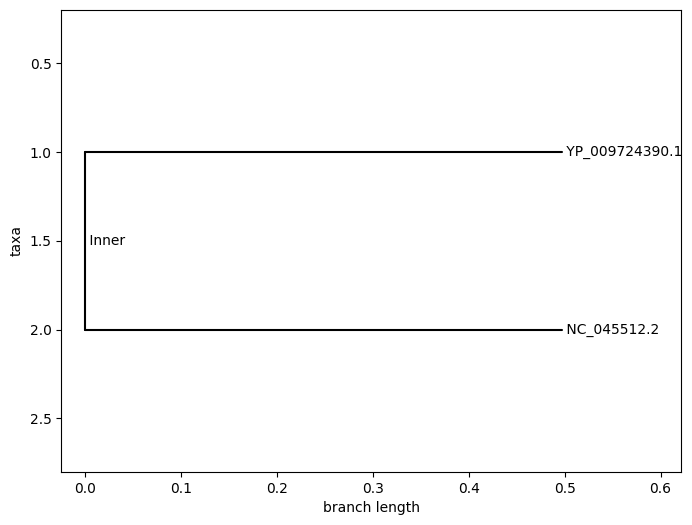

In [18]:
# Visualiztion of tree with matplotlib

fig= plt.figure(figsize=(8,6))
axes= fig.add_subplot(1,1,1)
Phylo.draw(nj_tree, do_show=False, axes=axes)
plt.show()